In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/udemy projeler/

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/udemy projeler/3- polynomialLinearRegression'
/content


In [ ]:
ls

diabetes.csv  knn.ipynb  KNN.ipynb


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


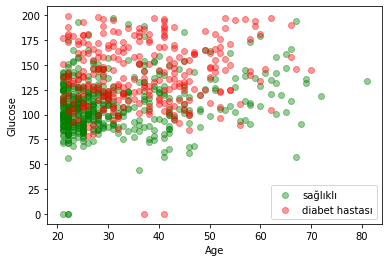

In [ ]:

seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]


# Şimdilik sadece gloucose'a bakarak örnek bir çizim yapalım:
# Programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="sağlıklı", alpha = 0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="diabet hastası", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [ ]:


# x ve y eksenlerini belirleyelim
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)   
# Outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü KNN algoritması x değerleri içerisinde gruplandırma yapacak..


# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())

Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  

In [ ]:

# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

# knn modelimizi oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 5) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=3 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))


K=3 için Test verilerimizin doğrulama testi sonucu  0.8181818181818182


In [ ]:



# k kaç olmalı ?
# en iyi k değerini belirleyelim..
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1

1    Doğruluk oranı: % 71.42857142857143
2    Doğruluk oranı: % 71.42857142857143
3    Doğruluk oranı: % 83.11688311688312
4    Doğruluk oranı: % 80.51948051948052
5    Doğruluk oranı: % 81.81818181818183
6    Doğruluk oranı: % 83.11688311688312
7    Doğruluk oranı: % 80.51948051948052
8    Doğruluk oranı: % 80.51948051948052
9    Doğruluk oranı: % 79.22077922077922
10    Doğruluk oranı: % 79.22077922077922


In [1]:
! git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [2]:
! git init


Initialized empty Git repository in /content/.git/


In [3]:
! git clone https://github.com/neslisogur/machine_learning.git

Cloning into 'machine_learning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
